In [1]:
#importing necessary libraries
import pandas as pd
import csv
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.offline as offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objs as go
offline.init_notebook_mode(connected=True)
pd.set_option('display.max_rows', 10)

In [2]:
#converting csv files into readable dataframes
shel_df = pd.read_csv(Path('data/SHEL_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
shel_df = shel_df["Adj Close"]

shel_df.head()
                      

Date
2017-10-01    49.569248
2017-11-01    50.426472
2017-12-01    53.255947
2018-01-01    56.074009
2018-02-01    50.509724
Name: Adj Close, dtype: float64

In [3]:
##converting csv files into readable dataframes
xom_df = pd.read_csv(Path('data/XOM_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
xom_df = xom_df["Adj Close"]

xom_df.head()
              

Date
2017-10-01    64.010841
2017-11-01    63.964775
2017-12-01    64.828041
2018-01-01    67.664841
2018-02-01    58.704857
Name: Adj Close, dtype: float64

In [4]:
#converting csv files into readable dataframes
ixc_df = pd.read_csv(Path('data/IXC_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
ixc_df = ixc_df["Adj Close"]

ixc_df.head()
              

Date
2017-10-01    27.338148
2017-11-01    27.707043
2017-12-01    28.508978
2018-01-01    29.981033
2018-02-01    27.226599
Name: Adj Close, dtype: float64

In [5]:
#converting csv files into readable dataframes
cvx_df = pd.read_csv(Path('data/CVX_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
cvx_df = cvx_df["Adj Close"]

cvx_df.head()
              

Date
2017-10-01     92.921890
2017-11-01     95.407494
2017-12-01    101.318382
2018-01-01    101.447868
2018-02-01     90.578758
Name: Adj Close, dtype: float64

In [6]:
#converting csv files into readable dataframes
cop_df = pd.read_csv(Path('data/COP_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
cop_df = cop_df["Adj Close"]

cop_df.head()

Date
2017-10-01    43.725098
2017-11-01    43.726921
2017-12-01    47.173164
2018-01-01    50.542061
2018-02-01    46.674702
Name: Adj Close, dtype: float64

In [7]:
#converting csv files into readable dataframes
#you can go back to the entire df by deleting "treasury_df = treasury_df["Adj Close"]", was not sure which columns we need
treasury_df = pd.read_csv(Path('data/10_yr_treasury_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
treasury_df = treasury_df["Adj Close"]
treasury_df.head()

Date
2017-10-01    2.376
2017-11-01    2.417
2017-12-01    2.405
2018-01-01    2.720
2018-02-01    2.868
Name: Adj Close, dtype: float64

In [8]:
#concatinating the dataframes to organize data in order to eventually get cumulative monthly returns
energy_stocks_df = pd.concat([shel_df, cop_df,cvx_df,xom_df,ixc_df],
                            axis=1)
energy_stocks_df=energy_stocks_df.set_axis(['SHEL', 'COP', 'CVX','XOM', 'IXC'], axis=1)
energy_stocks_df.head()

,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-10-01,49.569248,43.725098,92.921890,64.010841,27.338148
2017-11-01,50.426472,43.726921,95.407494,63.964775,27.707043
2017-12-01,53.255947,47.173164,101.318382,64.828041,28.508978
2018-01-01,56.074009,50.542061,101.447868,67.664841,29.981033
2018-02-01,50.509724,46.674702,90.578758,58.704857,27.226599


<AxesSubplot:title={'center':'Monthly Returns'}, xlabel='Date'>

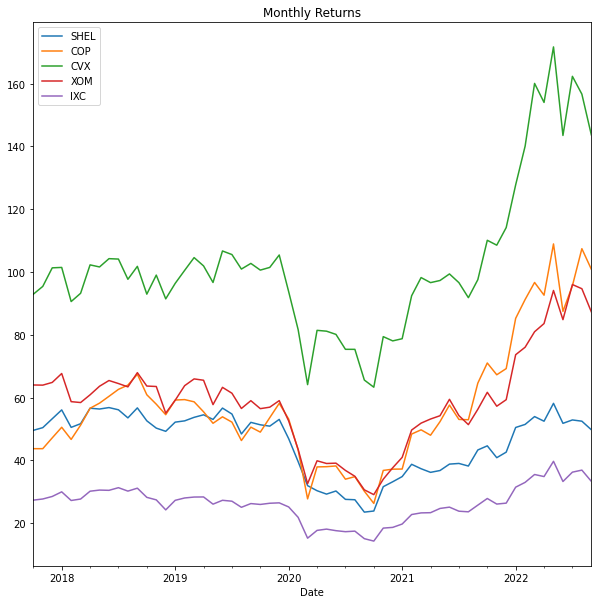

In [9]:
#visualizing monthly returns
energy_stocks_df.plot(figsize=(10,10), title = 'Monthly Returns')

In [10]:
#stocks return summary
energy_stocks_df.describe()


,SHEL,COP,CVX,XOM,IXC
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,45.889875,57.483592,102.559762,59.012818,26.304467
std,9.796329,19.451099,23.820843,15.466269,5.652586
min,23.520634,26.301830,63.304138,29.093813,14.297342
25%,38.613966,46.585681,92.272632,52.374467,23.553242
50%,50.453490,53.381300,99.191391,59.088278,26.737729
75%,53.041167,62.953677,104.786243,64.559563,30.031966
max,58.160614,108.933136,171.674988,95.997269,39.707764


In [11]:
#calculated percentage change
energy_stocks_df.pct_change().dropna().head()



,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-11-01,0.017293,0.000042,0.026749,-0.000720,0.013494
2017-12-01,0.056111,0.078813,0.061954,0.013496,0.028943
2018-01-01,0.052915,0.071416,0.001278,0.043759,0.051635
2018-02-01,-0.099231,-0.076518,-0.107140,-0.132417,-0.091873
2018-03-01,0.023208,0.097571,0.029085,-0.004846,0.017061


In [12]:
display(xom_df.describe())
display(cop_df.describe())
display(cvx_df.describe())
display(shel_df.describe())

count    60.000000
mean     59.012818
std      15.466269
min      29.093813
25%      52.374467
50%      59.088278
75%      64.559563
max      95.997269
Name: Adj Close, dtype: float64

count     60.000000
mean      57.483592
std       19.451099
min       26.301830
25%       46.585681
50%       53.381300
75%       62.953677
max      108.933136
Name: Adj Close, dtype: float64

count     60.000000
mean     102.559762
std       23.820843
min       63.304138
25%       92.272632
50%       99.191391
75%      104.786243
max      171.674988
Name: Adj Close, dtype: float64

count    60.000000
mean     45.889875
std       9.796329
min      23.520634
25%      38.613966
50%      50.453490
75%      53.041167
max      58.160614
Name: Adj Close, dtype: float64

In [13]:
display(xom_df.pct_change())
display(cop_df.pct_change())
display(cvx_df.pct_change())
display(shel_df.pct_change())

Date
2017-10-01         NaN
2017-11-01   -0.000720
2017-12-01    0.013496
2018-01-01    0.043759
2018-02-01   -0.132417
                ...   
2022-05-01    0.126100
2022-06-01   -0.098779
2022-07-01    0.131831
2022-08-01   -0.013824
2022-09-01   -0.077745
Name: Adj Close, Length: 60, dtype: float64

Date
2017-10-01         NaN
2017-11-01    0.000042
2017-12-01    0.078813
2018-01-01    0.071416
2018-02-01   -0.076518
                ...   
2022-05-01    0.176298
2022-06-01   -0.197105
2022-07-01    0.093264
2022-08-01    0.123371
2022-09-01   -0.060756
Name: Adj Close, Length: 60, dtype: float64

Date
2017-10-01         NaN
2017-11-01    0.026749
2017-12-01    0.061954
2018-01-01    0.001278
2018-02-01   -0.107140
                ...   
2022-05-01    0.114827
2022-06-01   -0.164256
2022-07-01    0.131234
2022-08-01   -0.034925
2022-09-01   -0.082782
Name: Adj Close, Length: 60, dtype: float64

Date
2017-10-01         NaN
2017-11-01    0.017293
2017-12-01    0.056111
2018-01-01    0.052915
2018-02-01   -0.099231
                ...   
2022-05-01    0.108366
2022-06-01   -0.109399
2022-07-01    0.020845
2022-08-01   -0.007494
2022-09-01   -0.051855
Name: Adj Close, Length: 60, dtype: float64

In [14]:
display(ixc_df.describe())
display(ixc_df.pct_change())

count    60.000000
mean     26.304467
std       5.652586
min      14.297342
25%      23.553242
50%      26.737729
75%      30.031966
max      39.707764
Name: Adj Close, dtype: float64

Date
2017-10-01         NaN
2017-11-01    0.013494
2017-12-01    0.028943
2018-01-01    0.051635
2018-02-01   -0.091873
                ...   
2022-05-01    0.139515
2022-06-01   -0.162008
2022-07-01    0.089414
2022-08-01    0.017931
2022-09-01   -0.096748
Name: Adj Close, Length: 60, dtype: float64

In [15]:
shel_count = np.count_nonzero(shel_df.pct_change()> ixc_df.pct_change())
shel_count

26

In [16]:
cop_count = np.count_nonzero(cop_df.pct_change()> ixc_df.pct_change())
cop_count

35

In [17]:
cvx_count = np.count_nonzero(cvx_df.pct_change()> ixc_df.pct_change())
cvx_count

32

In [18]:
xom_count = np.count_nonzero(xom_df.pct_change()> ixc_df.pct_change())
xom_count

29

In [19]:
outperformance = [ xom_count, cvx_count, shel_count, cop_count]
pct_outperformance_df = pd.DataFrame (outperformance, columns = ['Number of Times Stock Outperformed IXC '], index = ['XOM','CVX','SHEL','COP'])
pct_outperformance_df

,Number of Times Stock Outperformed IXC
XOM,29
CVX,32
SHEL,26
COP,35


<AxesSubplot:title={'center':'Energy Stock Outperformance vs Energy ETF (IXC)'}>

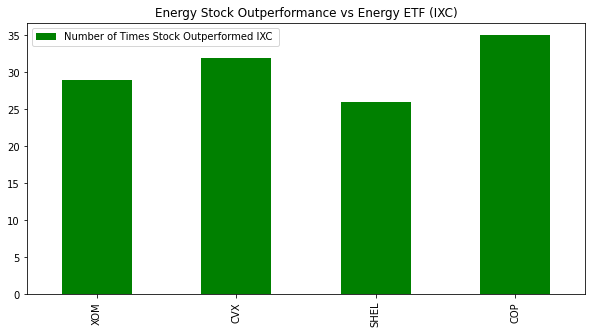

In [20]:
pct_outperformance_df.plot(kind='bar',figsize=(10,5), title="Energy Stock Outperformance vs Energy ETF (IXC)", color='green')

In [21]:
#Analysis: From gathering data and cleaning it up to calculate percent 
#changes between the stocks we picked and the IXC ETF, we found the number of times(monthly) within
# a 5 year period where the stocks returns outperformed the ETF. XOM outperformed IXC 26 times, CVX beat IXC
#32 times, SHEL beat IXC 26 times and COP beat IXC 35 times. This makes COP the safest stock within the IXC 
# to invest in, in terms of monthly returns calculated from percentage change.


In [22]:
cumulative_return = (energy_stocks_df.iloc[-1] - energy_stocks_df.iloc[0]) / energy_stocks_df.iloc[0]
cumulative_return

SHEL    0.003848
COP     1.307353
CVX     0.546137
XOM     0.363988
IXC     0.219176
dtype: float64

In [23]:
cumulative_return= cumulative_return*100

In [24]:
cumulative_return_df=pd.DataFrame(cumulative_return,columns=['Cumulative Return'])
cumulative_return_df

,Cumulative Return
SHEL,0.384815
COP,130.735318
CVX,54.613728
XOM,36.398767
IXC,21.917556


<AxesSubplot:title={'center':'Cumulative Returns'}>

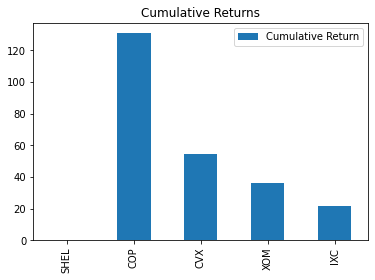

In [25]:
cumulative_return_df.plot.bar(title="Cumulative Returns")

In [26]:
df_monthly_returns = energy_stocks_df.pct_change()
df_monthly_returns.head()

,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-10-01,NaN,NaN,NaN,NaN,NaN
2017-11-01,0.017293,0.000042,0.026749,-0.000720,0.013494
2017-12-01,0.056111,0.078813,0.061954,0.013496,0.028943
2018-01-01,0.052915,0.071416,0.001278,0.043759,0.051635
2018-02-01,-0.099231,-0.076518,-0.107140,-0.132417,-0.091873


In [27]:
df_cumul_monthly_returns = df_monthly_returns.cumsum() 

df_cumul_monthly_returns.head()

,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-10-01,NaN,NaN,NaN,NaN,NaN
2017-11-01,0.017293,0.000042,0.026749,-0.000720,0.013494
2017-12-01,0.073404,0.078855,0.088704,0.012776,0.042437
2018-01-01,0.126320,0.150270,0.089982,0.056535,0.094072
2018-02-01,0.027089,0.073752,-0.017158,-0.075882,0.002199


<AxesSubplot:title={'center':'cumul returns'}, xlabel='Date'>

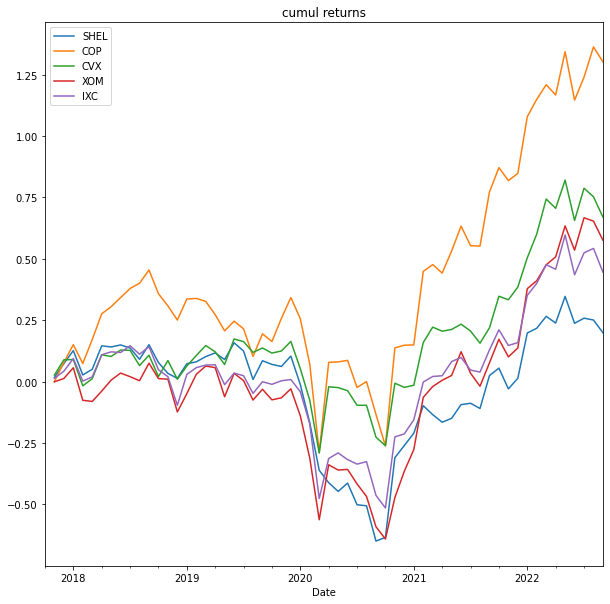

In [28]:
df_cumul_monthly_returns.plot.line(title='cumul returns', figsize=(10,10))

In [29]:
cumul_return_entire_period = df_cumul_monthly_returns.tail(1)
cumul_return_entire_period * 100

,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2022-09-01,19.893261,130.167171,66.951164,57.54117,44.546831


In [30]:
shel_alpha_cumul = (cumul_return_entire_period['SHEL']-cumul_return_entire_period['IXC'])
shel_alpha_cumul

Date
2022-09-01   -0.246536
dtype: float64

In [31]:
df_cumul_monthly_returns = df_cumul_monthly_returns.reset_index()
df1 = df_cumul_monthly_returns.melt(id_vars=['Date'], var_name='ticker', value_name='cumul_return')
df1['cumul_monthly_return_pct'] = df1['cumul_return'] * 100
df1

,Date,ticker,cumul_return,cumul_monthly_return_pct
0,2017-10-01,SHEL,NaN,NaN
1,2017-11-01,SHEL,0.017293,1.729346
2,2017-12-01,SHEL,0.073404,7.340437
3,2018-01-01,SHEL,0.126320,12.631981
4,2018-02-01,SHEL,0.027089,2.708872
...,...,...,...,...
295,2022-05-01,IXC,0.596880,59.687968
296,2022-06-01,IXC,0.434871,43.487129
297,2022-07-01,IXC,0.524285,52.428518
298,2022-08-01,IXC,0.542216,54.221627


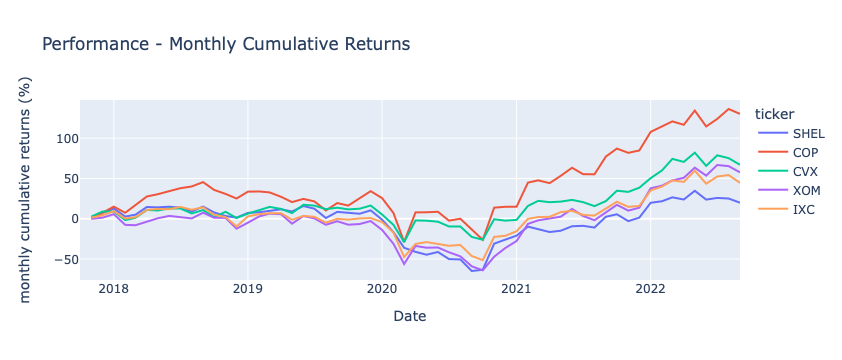

In [32]:
fig = px.line(df1, x='Date',
              y='cumul_monthly_return_pct', color='ticker',
              title='Performance - Monthly Cumulative Returns',
              labels={'cumul_monthly_return_pct':'monthly cumulative returns (%)'})
fig.show()

In [33]:
df_monthly_returns = df_monthly_returns.reset_index()
df2 = df_monthly_returns.melt(id_vars=['Date'], var_name='ticker', value_name='monthly_return')
# add one more column, showing the daily_return as percent
df2['monthly_return_pct'] = df2['monthly_return'] * 100
df2

,Date,ticker,monthly_return,monthly_return_pct
0,2017-10-01,SHEL,NaN,NaN
1,2017-11-01,SHEL,0.017293,1.729346
2,2017-12-01,SHEL,0.056111,5.611091
3,2018-01-01,SHEL,0.052915,5.291544
4,2018-02-01,SHEL,-0.099231,-9.923109
...,...,...,...,...
295,2022-05-01,IXC,0.139515,13.951529
296,2022-06-01,IXC,-0.162008,-16.200839
297,2022-07-01,IXC,0.089414,8.941389
298,2022-08-01,IXC,0.017931,1.793109


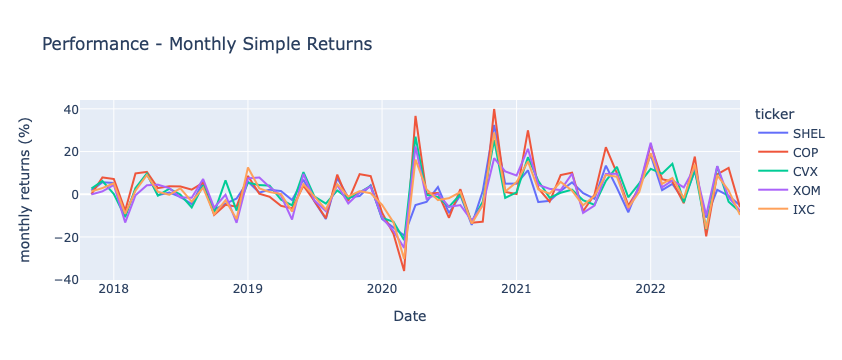

In [34]:
fig = px.line(df2, x='Date',
              y='monthly_return_pct', color='ticker',
              title='Performance - Monthly Simple Returns',
              labels={'monthly_return_pct':'monthly returns (%)'})
fig.show()

In [35]:
shel_alpha_cumul = (cumul_return_entire_period['SHEL']-cumul_return_entire_period['IXC'])
shel_alpha_cumul

Date
2022-09-01   -0.246536
dtype: float64

In [36]:
cop_alpha_cumul = (cumul_return_entire_period['COP']-cumul_return_entire_period['IXC'])
cop_alpha_cumul

Date
2022-09-01    0.856203
dtype: float64

In [37]:
cvx_alpha_cumul = (cumul_return_entire_period['CVX']-cumul_return_entire_period['IXC'])
cvx_alpha_cumul

Date
2022-09-01    0.224043
dtype: float64

In [38]:
xom_alpha_cumul = (cumul_return_entire_period['XOM']-cumul_return_entire_period['IXC'])
xom_alpha_cumul

Date
2022-09-01    0.129943
dtype: float64

In [48]:
stock_alphas = (shel_alpha_cumul,cop_alpha_cumul,cvx_alpha_cumul,xom_alpha_cumul)
alpha_df=pd.DataFrame(stock_alphas)


In [76]:
#still have to rename index and column

alpha_df.columns = ['Alpha']
alpha_df.index=[ "SHEL", "COP","CVX","XOM"]
alpha_df


,Alpha
SHEL,-0.246536
COP,0.856203
CVX,0.224043
XOM,0.129943


In [52]:
shel_stocks_alpha_df = df_cumul_monthly_returns['SHEL']-df_cumul_monthly_returns['IXC']

In [53]:
cop_stocks_alpha_df = df_cumul_monthly_returns['COP']-df_cumul_monthly_returns['IXC']

In [54]:
cvx_stocks_alpha_df = df_cumul_monthly_returns['CVX']-df_cumul_monthly_returns['IXC']

In [55]:
xom_stocks_alpha_df = df_cumul_monthly_returns['XOM']-df_cumul_monthly_returns['IXC']

In [78]:
all_stocks_alpha=(shel_stocks_alpha_df,cop_stocks_alpha_df,cvx_stocks_alpha_df,xom_stocks_alpha_df)
all_stocks_alpha_df = pd.DataFrame(all_stocks_alpha)
all_stocks_alpha_df=all_stocks_alpha_df.transpose()
all_stocks_alpha_df.columns=['SHEL','COP','CVX','XOM']


<AxesSubplot:title={'center':'cumulative alphas'}>

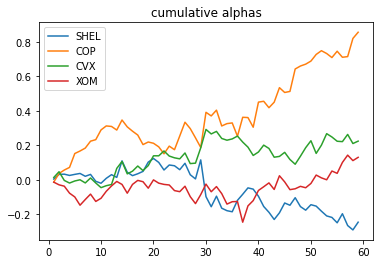

In [79]:
all_stocks_alpha_df.plot.line(title='cumulative alphas')